In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
import pandas as pd

In [3]:
# data = pd.read_csv('https://raw.githubusercontent.com/HendersonAlec2212/project_04/main/csv/PICKUP_DATA_CLEAN.csv', low_memory=False)
data = pd.read_csv('/home/dan/Downloads/PICKUP_DATA_CLEAN.csv')

In [4]:
data.head()

,brandName,modelName,vf_ModelID,vf_ModelYear,mileage,askPrice,msrp,color,vf_EngineCylinders,vf_FuelTypePrimary,vin
0,FORD,F-250,1805.0,2017.0,19106,40962,40962,Ingot Silver Metallic,8.0,Diesel,bcd4bbecbba3b9ed2330d543abc3d90b997aa8fa6e628d...
1,FORD,F-150,1801.0,2017.0,28194,28962,28962,Ingot Silver Metallic,6.0,Gasoline,a8f09496d9523e33ee3a8f885a475f5ef001d68a334c98...
2,GMC,Sierra,1857.0,2017.0,7483,43962,43962,Crimson Red Tintcoat,8.0,Gasoline,c65dd3e96f4f68a0d4c7b09005273e0312295057c7c529...
3,FORD,F-250,1805.0,2017.0,23881,38962,38962,Oxford White,8.0,Diesel,966168515802a7cf510d6c87a15cf71cc4385316a504c6...
4,GMC,Canyon,4093.0,2017.0,6333,30962,30962,Onyx Black,6.0,Gasoline,9c7648c843035d0b46e9d716d947dfa3d0e8881054247a...


In [5]:
data = data.drop(columns='color')
data = data.drop(columns='vin')
data = data.drop(columns='vf_ModelID')
data = data.drop(columns='msrp')

In [6]:
data.head()

,brandName,modelName,vf_ModelYear,mileage,askPrice,vf_EngineCylinders,vf_FuelTypePrimary
0,FORD,F-250,2017.0,19106,40962,8.0,Diesel
1,FORD,F-150,2017.0,28194,28962,6.0,Gasoline
2,GMC,Sierra,2017.0,7483,43962,8.0,Gasoline
3,FORD,F-250,2017.0,23881,38962,8.0,Diesel
4,GMC,Canyon,2017.0,6333,30962,6.0,Gasoline


In [7]:
data['vf_FuelTypePrimary'].nunique()

2

In [8]:
data = pd.get_dummies(data)

In [9]:
data

,vf_ModelYear,mileage,askPrice,vf_EngineCylinders,brandName_CHEVROLET,brandName_DODGE,brandName_FORD,brandName_GMC,brandName_HONDA,brandName_HUMMER,...,modelName_Silverado HD,modelName_Silverado LD,modelName_Sonoma,modelName_Tacoma,modelName_Titan,modelName_Tundra,modelName_W-Series,modelName_i-290,vf_FuelTypePrimary_Diesel,vf_FuelTypePrimary_Gasoline
0,2017.0,19106,40962,8.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2017.0,28194,28962,6.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2017.0,7483,43962,8.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2017.0,23881,38962,8.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2017.0,6333,30962,6.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50783,2014.0,47739,26476,8.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
50784,2019.0,14050,48443,8.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
50785,2019.0,4032,30950,6.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
50786,2016.0,34511,40688,8.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [10]:
y = data['askPrice']
X = data.drop(columns='askPrice')

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=52)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
clf = RandomForestRegressor(random_state=1).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.966393664322053
Testing Score: 0.7563119199170782


In [13]:
feature_importances = clf.feature_importances_

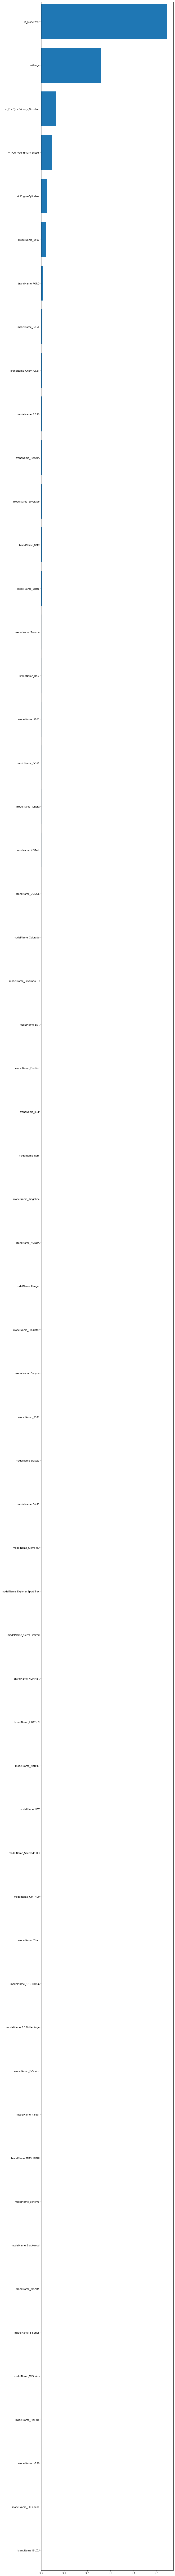

In [14]:
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,200)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()